Accuracy: 0.52
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.59      0.55       150
           1       0.52      0.45      0.49       150

    accuracy                           0.52       300
   macro avg       0.52      0.52      0.52       300
weighted avg       0.52      0.52      0.52       300



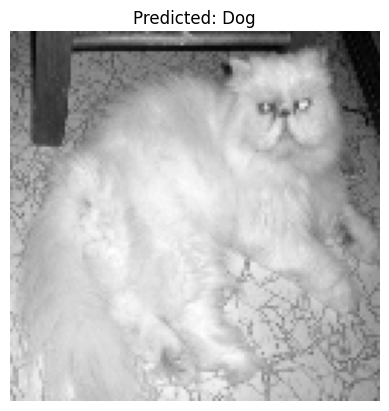

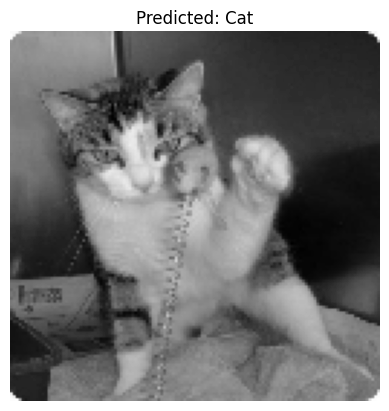

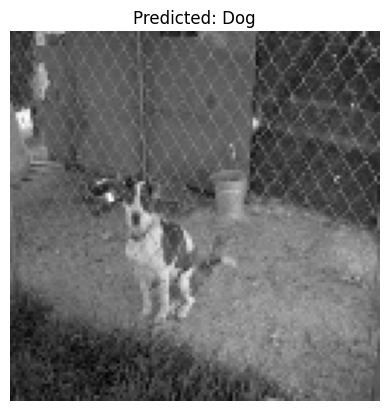

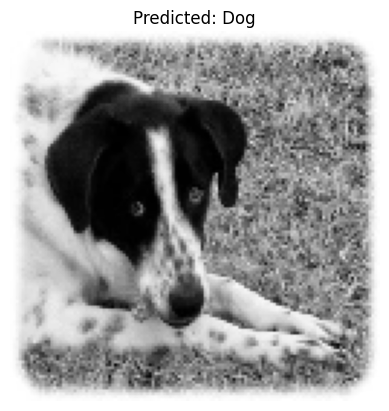

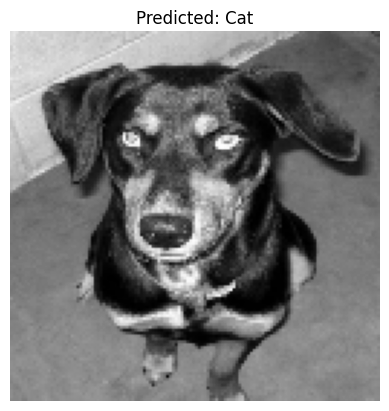

In [13]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


dataset_path = 'E:/Jupyter/Prodigy/Task-3/train/train'      #path of the sample data file


IMG_SIZE = 128          #pixel size
MAX_PER_CLASS = 750     #number of photos to be trained with 

X, y = [], []           #list to store the photo and its classification
cat_count, dog_count = 0, 0

# Load and preprocess limited number of images
for file in os.listdir(dataset_path):
    if 'cat' in file and cat_count < MAX_PER_CLASS:
        label = 0
        cat_count += 1
    elif 'dog' in file and dog_count < MAX_PER_CLASS:
        label = 1
        dog_count += 1                              #classifying based on the file name
    else:
        continue

    img_path = os.path.join(dataset_path, file)     #creating path of image
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)        #change to b&W
        X.append(img_gray.flatten())
        y.append(label)

    if cat_count >= MAX_PER_CLASS and dog_count >= MAX_PER_CLASS:
        break

# Convert to NumPy
X = np.array(X)
y = np.array(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Train the model
model = SVC(kernel='linear')
model.fit(X_train, y_train)         #populate the model

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Show 5 test predictions
for i in range(5):
    plt.imshow(X_test[i].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
    plt.title(f"Predicted: {'Dog' if y_pred[i] else 'Cat'}")
    plt.axis('off')
    plt.show()              #randomly choose 5 photos of cats and dogs and predict 
